In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df=df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', ],axis=True)

In [6]:
df.columns

Index(['fare_amount', 'passenger_count'], dtype='object')

Step 2: Identify outliers

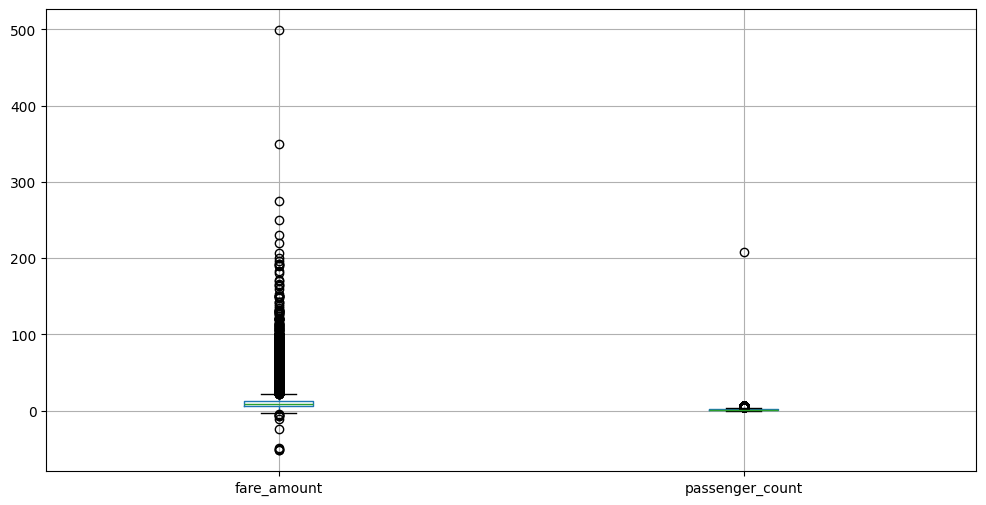

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df.boxplot(column=['fare_amount', 'passenger_count'])
plt.show()

In [11]:
df = df[df['fare_amount'].between(df['fare_amount'].quantile(0.25), df['fare_amount'].quantile(0.75))]
df = df[df['passenger_count'].between(df['passenger_count'].quantile(0.25), df['passenger_count'].quantile(0.75))]

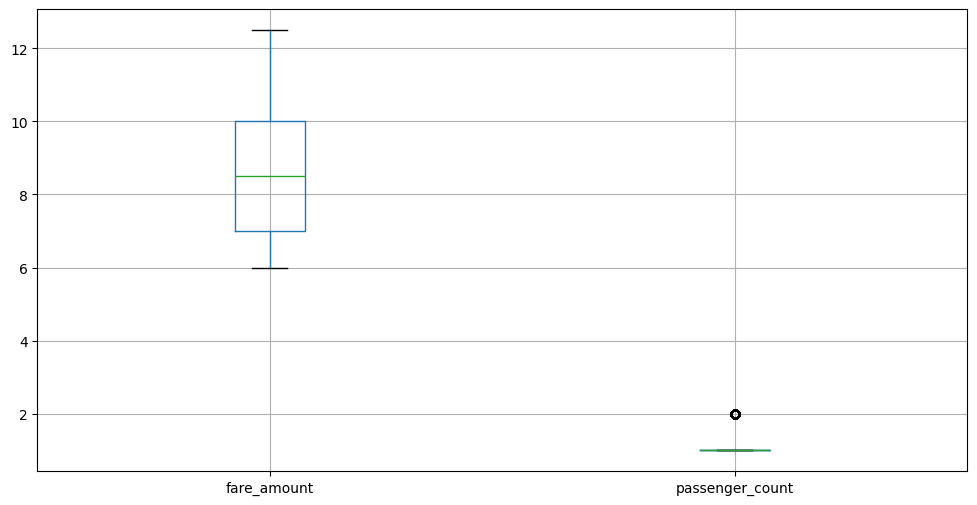

In [12]:
plt.figure(figsize=(12,6))
df.boxplot(column=['fare_amount','passenger_count'])
plt.show()

Step 3: Check correlation

<Axes: >

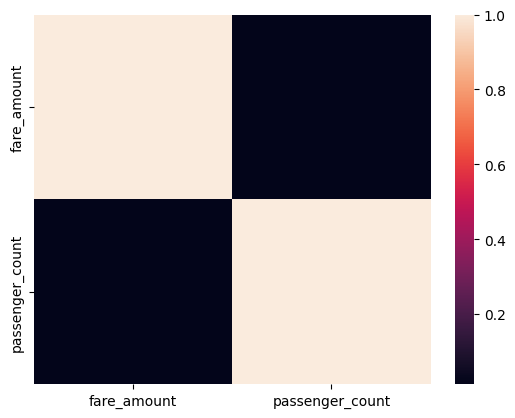

In [13]:
import seaborn as sns
sns.heatmap(df.corr())

standardization

In [24]:
x=df.drop(columns=['fare_amount'])
y=df['fare_amount']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

linear regression model

In [29]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)

Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

Evaluation of models

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

In [34]:
def evaluate(y_test,y_pred):
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    return rmse,r2

In [35]:
lr_rmse,lr_r2=evaluate(y_test,lr_pred)
rf_rmse,rf_r2=evaluate(y_test,rf_pred)
print('rmse of linear regression: ',lr_rmse,'r2 score of linear regression: ',lr_r2)
print('rmse of random forest: ',rf_rmse,'r2 score of random forest: ',rf_r2)

rmse of linear regression:  1.8752055137044756 r2 score of linear regression:  -6.469303077327737e-05
rmse of random forest:  1.875213856699899 r2 score of random forest:  -7.359184603061841e-05
